# Decision Tree & Random Forest Modeling for Customer Churn

This notebook uses the cleaned churn dataset prepared in Week 2 to build and evaluate tree-based classifiers for predicting customer churn. The main goals are:

- Fit and visualize a Decision Tree and tune its maximum depth (or tune with a hyperparameter search) to avoid overfitting.

- Analyze feature–target correlations and identify features with strong predictive power.

- Fit a Random Forest, inspect feature importances, and remove the least important features to evaluate whether a simpler model performs as well.

- Compare model performance using training and test scores, confusion matrices and feature importance visualizations.

These models help identify which features (e.g., contract type, tenure) are most informative for predicting churn and support actionable retention strategies by highlighting at-risk customers.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('new_churn_data_.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_tenure_ratio
customerID,,,,,,,,
7590-VHVEG,1,2,1,3,29.85,29.85,2,29.850000
5575-GNVDE,34,1,2,4,56.95,1889.50,2,55.573529
3668-QPYBK,2,1,1,4,53.85,108.15,1,54.075000
7795-CFOCW,45,2,2,1,42.30,1840.75,2,40.905556
9237-HQITU,2,1,1,3,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,2,4,84.80,1990.50,2,82.937500
2234-XADUH,72,1,2,2,103.20,7362.90,2,102.262500
4801-JZAZL,11,2,1,3,29.60,346.45,2,31.495455


In [41]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=3)

In [49]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5282, 7)
y_train shape: (5282,)
x_test shape: (1761, 7)
y_test shape: (1761,)


In [50]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9933737220749717
0.7257240204429302


In [6]:
dt.get_depth()

28

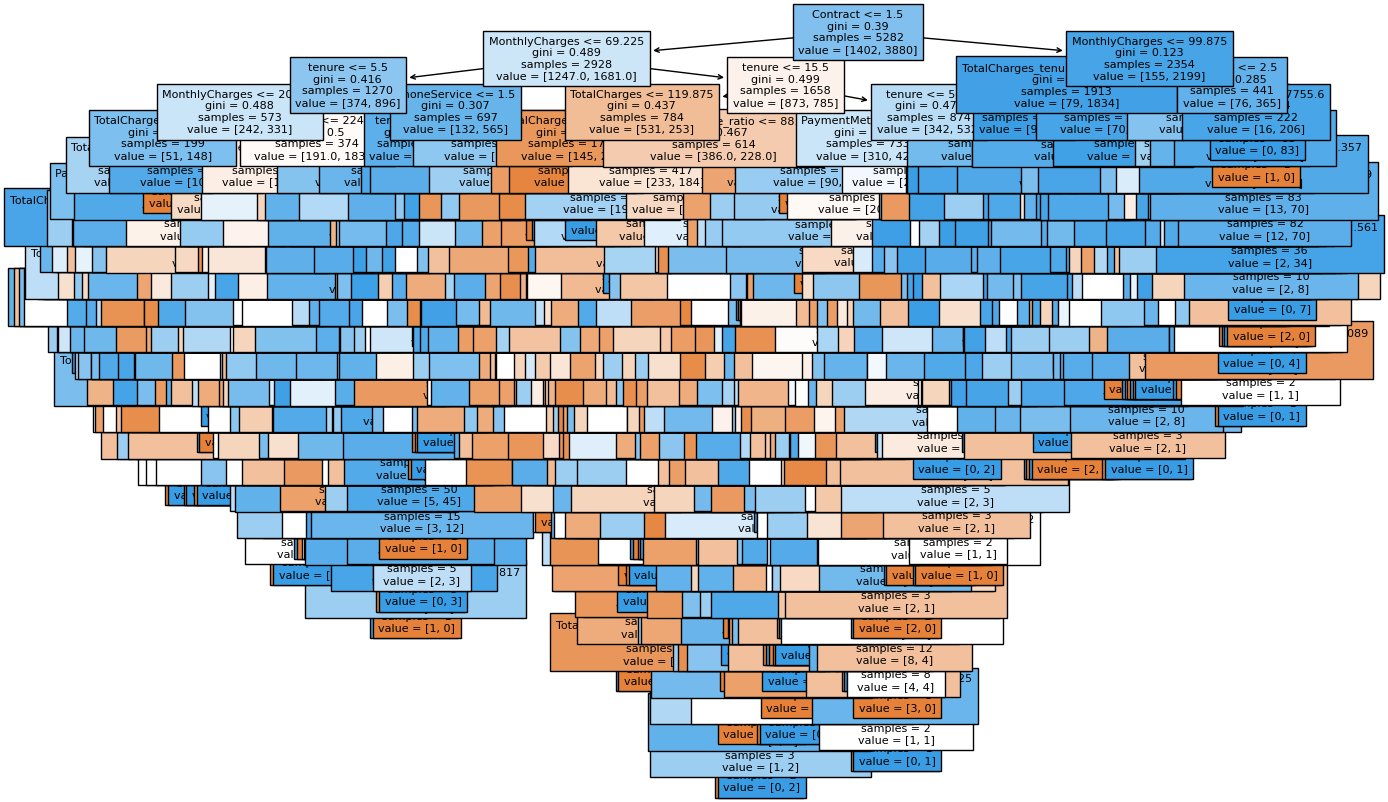

In [51]:
f = plt.figure(figsize=(15, 10))
_ = plot_tree(dt, fontsize=8, feature_names=features.columns, filled=True)

In [43]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.7872018174933737
0.787052810902896


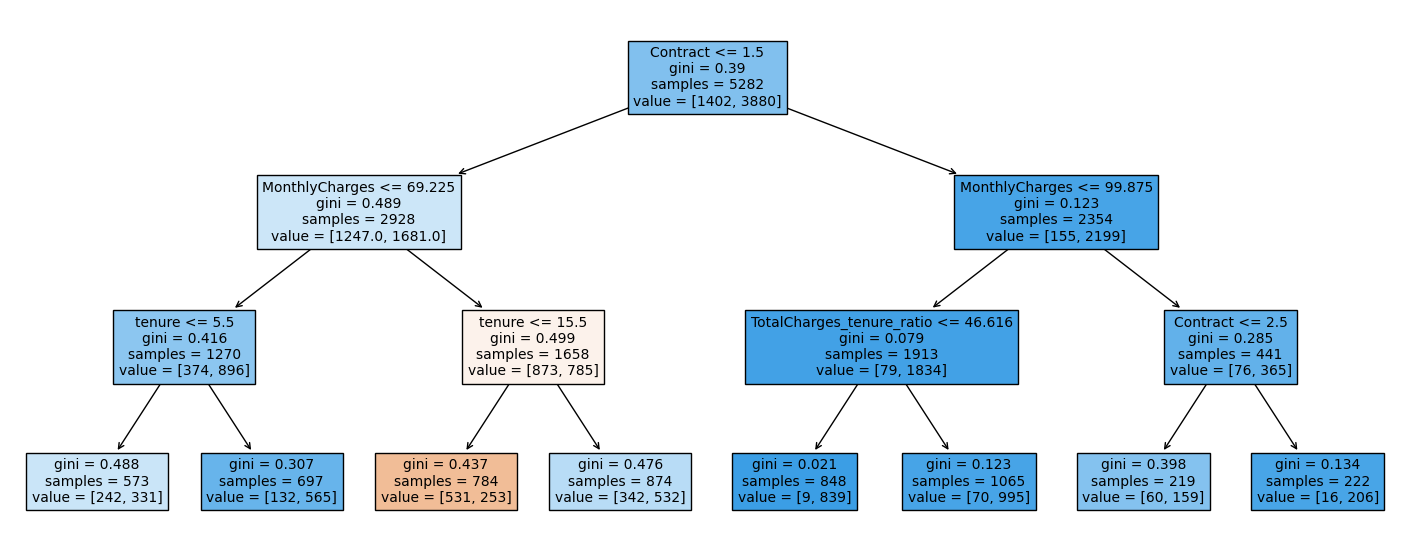

In [17]:
f = plt.figure(figsize=(18, 7))
_ = plot_tree(dt, fontsize=10, feature_names=features.columns, filled=True)

In [52]:
    from sklearn.ensemble import RandomForestClassifier

    rfc = RandomForestClassifier(max_depth=4, random_state=3)
    rfc.fit(x_train, y_train)

    print(rfc.score(x_train, y_train))
    print(rfc.score(x_test, y_test))

0.7953426732298372
0.7910278250993753


In [19]:
import math

math.sqrt(x_train.shape[1])

2.6457513110645907

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=6, max_features=8, random_state=3)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8129496402877698
0.8012492901760363


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=3)

In [25]:
X = features
y = targets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
rfc = RandomForestClassifier(random_state=3)
param_grid = {
        'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 500],
    'max_features': [3, 5, 7]
    }

In [27]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'max_features': 3, 'n_estimators': 500}


In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, max_features=3, n_estimators=500, random_state=3)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.8053767512305945
0.8001135718341851


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [86]:
import seaborn as sns

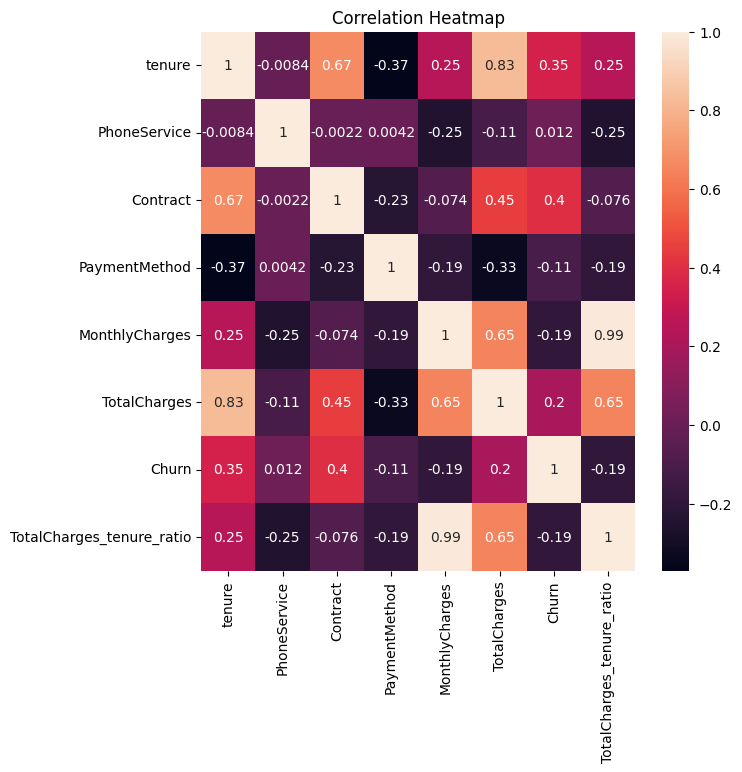

In [91]:
f = plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

<Axes: title={'center': 'Feature Importance'}>

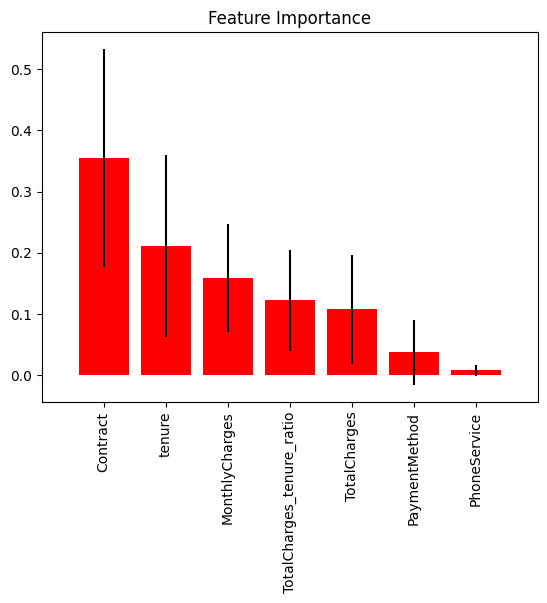

In [92]:
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(rfc, feature_names=features.columns, x_tick_rotation=90)

In [93]:
new_features = features.drop(['PaymentMethod', 'PhoneService'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_features, targets, stratify=targets, random_state=3)

In [94]:
rfc = RandomForestClassifier(max_depth=5, max_features=3, random_state=3)
rfc.fit(x_train, y_train)

print(rfc.score(x_train, y_train))
print(rfc.score(x_test, y_test))

0.802158273381295
0.7950028392958546


<Axes: title={'center': 'Feature Importance'}>

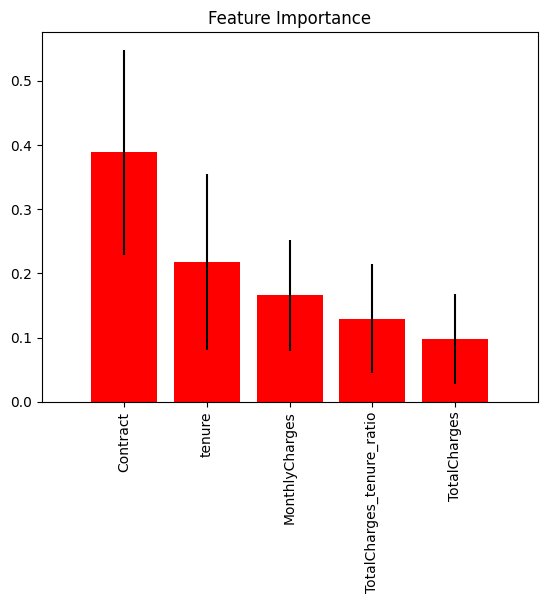

In [95]:
plot_feature_importances(rfc, feature_names=new_features.columns, x_tick_rotation=90)

# Summary

Using the modified file that I have been working on, I separated between features and objectives and train and sets, I did the tree, but it doesn't make sense since it was 28 deep, so I changed the depth to 3 and it improved, getting a training score of 0.7872 and a test score of 0.7870.
Then using sklearn I fit a decision tree, getting a bit of improvement, training score of 0.7953 and a test score of 0.7910. But to optimize the hyperparameters of a model I decided to use Gridsearch, obtaining with the suggested results a training score of 0.8053 and a test score of 0.8001, using this I plot the correlations between features and targets, finding for example that tenure and totalcharges have a very good correlation of 0.83 and that on the contrary payment method and tenure are poorly correlated with -0.37.

Using a pre-built scikit-plot function, it is reflected that the most important variables are Contract and Tenure and the least important are PaymentMethod and PhoneService. The decision was made to eliminate PaymentMethod and PhoneService and adjust the random forest to the new data without finding much improvement in performance; the order of importance of the variables is maintained but their level of importance increases. Notoriusly, "Contract" is the most important in predicting if a customer will churn.

Maryi Palacios